In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os
top = os.getenv('HOME')+'/codes/dispatch2/'
os.chdir(top+'experiments/ISM/python')
import tqdm


import sys
sys.path.insert(0,top+'utilities/python')
import dispatch as dis
import dispatch.select as dse
import dispatch.graphics as dgr
import dispatch.particles as dpa


In [7]:
snaps = {}

i_snap = 275; f_snap = 275 + 1
for io in range(i_snap, f_snap):
    sn = dis.snapshot(io,'my_core_sink82')
    cgs_time = sn.scaling.t / sn.cgs.yr
    snaps[io] = sn
    print(io, f'{sn.time * cgs_time:3.0f} yr')

275 23072449 yr


In [8]:
sn = snaps[275]

In [9]:
for p in sn.patches:
    if p.id == 1853:
        break

In [10]:
p.position

array([0.109375, 0.484375, 0.265625])

In [11]:
patch_pos = np.array([0.33445818,0.44181570,-0.19279127])
#sns=sn.statobj('(bx**2+by**2+bz**2)/d')
bmax=2e4; bl=[-bmax,bmax]
umax=5; ul=[-umax,umax]
sns=sn.statobj('d')
plt.figure(figsize = (18,12))
npix=200; w=npix*0.5**20
plt.subplot(3,3,1); dgr.amr_plane(sn,'np.log10(((bx**2+by**2+bz**2)/d)**0.5)',center=patch_pos,to='au',vmax=1.5,vmin=-1,width=w,mesh=0,title='        log10(V_A)');
plt.subplot(3,3,2); dgr.amr_plane(sn,'np.log10((bx**2+by**2+bz**2)**0.5)',center=patch_pos,width=w,mesh=1,vmin=2,title='     log10(B)')
plt.subplot(3,3,3); dgr.amr_plane(sn,'logd',center=patch_pos,width=w,mesh=0,ident=0,vmin=6,to='pc',title='           log10(d)');
plt.subplot(3,3,4); dgr.amr_plane(sn,'bx',center=patch_pos,width=w,mesh=0,vmin=bl[0],vmax=bl[1],title='                   Bx')
plt.subplot(3,3,5); dgr.amr_plane(sn,'by',center=patch_pos,width=w,mesh=0,vmin=bl[0],vmax=bl[1],title='                   By',ident=0)
plt.subplot(3,3,6); dgr.amr_plane(sn,'bz',center=patch_pos,width=w,mesh=0,vmin=bl[0],vmax=bl[1],title='                   Bz')
plt.subplot(3,3,7); dgr.amr_plane(sn,'ux',center=patch_pos,width=w,mesh=0,vmin=ul[0],vmax=ul[1],title='                   Ux')
plt.subplot(3,3,8); dgr.amr_plane(sn,'uy',center=patch_pos,width=w,mesh=0,vmin=ul[0],vmax=ul[1],title='                   Uy',ident=0)
plt.subplot(3,3,9); dgr.amr_plane(sn,'uz',center=patch_pos,width=w,mesh=0,vmin=ul[0],vmax=ul[1],title='                   Uz')
plt.tight_layout();

ValueError: minvalue must be less than or equal to maxvalue

<Figure size 1296x864 with 17 Axes>

In [49]:
snaps = {}

i_snap = 223; f_snap = 380 + 1
for io in range(i_snap, f_snap):
    sn = dis.snapshot(io,'my_core_13fixed')
    cgs_time = sn.scaling.t / sn.cgs.yr
    snaps[io] = sn
    print(io, f'{sn.time * cgs_time:3.0f} yr')

223  87 yr
224 174 yr
225 261 yr
226 348 yr
227 435 yr
228 522 yr
229 609 yr
230 695 yr
231 782 yr
232 869 yr
233 956 yr
234 1043 yr
235 1130 yr
236 1217 yr
237 1304 yr
238 1391 yr
239 1478 yr
240 1565 yr
241 1652 yr
242 1739 yr
243 1826 yr
244 1913 yr
245 1999 yr
246 2086 yr
247 2173 yr
248 2260 yr
249 2347 yr
250 2434 yr
251 2521 yr
252 2608 yr
253 2695 yr
254 2782 yr
255 2869 yr
256 2956 yr
257 3043 yr
258 3130 yr
259 3217 yr
260 3303 yr
261 3390 yr
262 3477 yr
263 3564 yr
264 3651 yr
265 3738 yr
266 3825 yr
267 3912 yr
268 3999 yr
269 4086 yr
270 4173 yr
271 4260 yr
272 4347 yr
273 4434 yr
274 4521 yr
275 4607 yr
276 4694 yr
277 4781 yr
278 4868 yr
279 4955 yr
280 5042 yr
281 5129 yr
282 5216 yr
283 5303 yr
284 5390 yr
285 5477 yr
286 5564 yr
287 5651 yr
288 5738 yr
289 5825 yr
290 5911 yr
291 5998 yr
292 6085 yr
293 6172 yr
294 6259 yr
295 6346 yr
296 6433 yr
297 6520 yr
298 6607 yr
299 6694 yr
300 6781 yr
301 6868 yr
302 6955 yr
303 7042 yr
304 7129 yr
305 7215 yr
306 7302 yr
307

In [ ]:
dist = lambda dist1, dist2: np.sqrt(np.sum((dist1 - dist2)**2))

In [46]:
alfven_max = np.zeros(len(snaps))
patch_id_maxloc = np.zeros(len(snaps))
t = np.zeros(len(snaps))
for i, io in tqdm.tqdm(enumerate(np.arange(i_snap, f_snap))):

    t[i] = snaps[io].time * cgs_time
    snapshot_stat = snaps[io].statobj('(bx**2+by**2+bz**2)/d',verbose = False)
    patch_id_maxloc
    alfven_max[i] = snapshot_stat.max

81it [06:39,  4.93s/it]


In [47]:
#np.savetxt('alfven_speed', alfven_max)
#np.savetxt('alfven_times', t)

[Text(0, 0.5, 'log10(V_A)'), Text(0.5, 0, 'Time [yr]')]

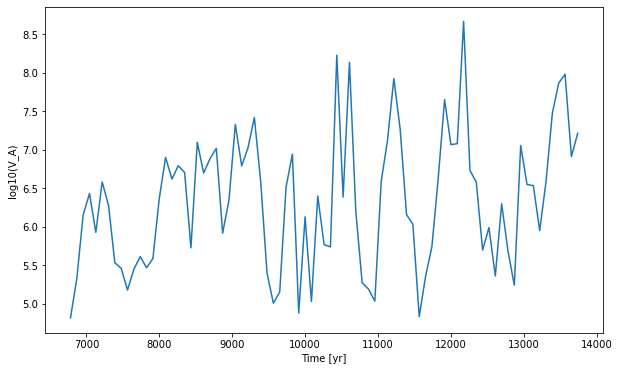

In [4]:
fig, axs = plt.subplots(figsize = (10, 6))
axs.plot(np.genfromtxt('alfven_times'), np.log10(np.genfromtxt('alfven_speed')))
axs.set(ylabel = 'log10(V_A)', xlabel = 'Time [yr]')

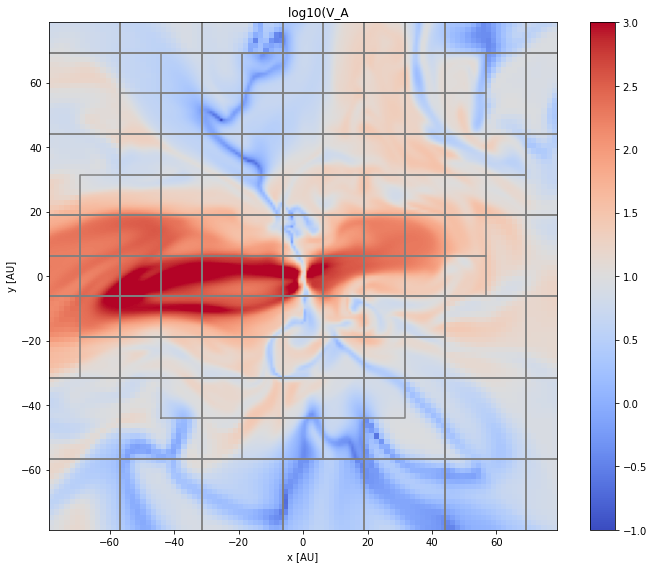

In [25]:
fig, axs = plt.subplots(figsize = (10, 8))

dgr.amr_plane(sn,'np.log10(((bx**2+by**2+bz**2)/d)**0.5)',center=patch_pos,to='au',vmax=3,vmin=-1,width=w,mesh=1,title='        log10(V_A')
snapshot_stat = snaps[io].statobj('(bx**2+by**2+bz**2)/d',verbose = False)

expression: (bx**2+by**2+bz**2)/d
   average:   3.2434e+02
       rms:   4.8758e+02
       max:   1.6413e+07, id=1853 at [0.19189882278442358, -0.4358735084533694, 0.28830671310424777]
       min:   2.7326e-04, id=1758 at [0.19199562072753906, -0.4360218048095703, 0.28841209411621094]
      lmax:   20


0.00027326197596266866